# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)

In [18]:
prev_renda = pd.read_csv('previsao_de_renda.csv')

base1 = prev_renda[['sexo','posse_de_veiculo','posse_de_imovel','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]

base1.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,1,36,3.575342,3.0,3369.24
1,M,True,True,0,42,0.860274,2.0,6096.14
2,M,True,True,2,31,8.065753,4.0,5658.98
3,F,True,False,0,50,1.208219,2.0,7246.69
4,M,False,False,0,52,13.873973,2.0,4017.37


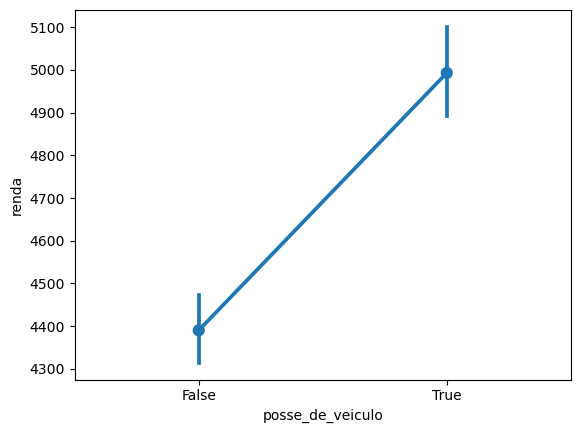

In [4]:
ax = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=base1, dodge=True, errorbar=('ci', 90))

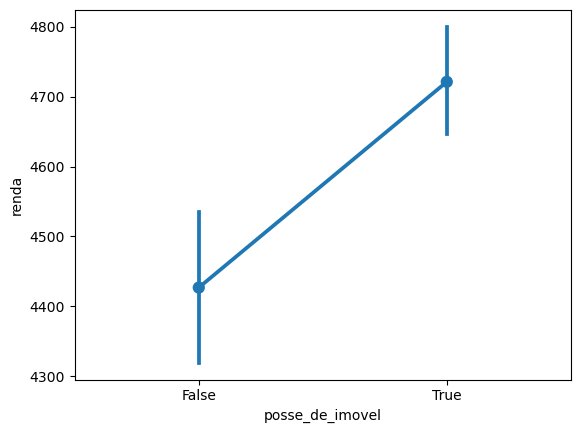

In [5]:
ax = sns.pointplot(x="posse_de_imovel", y="renda",
                   data=base1, dodge=True, errorbar=('ci', 90))

In [6]:
base1.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


## Ainda que os gráficos mostrem uma separação relevante entre as populações das variáveis discretas, no método de correlação, os valores são insatisfatórios

In [ ]:
base2 = base1.copy()

base2.loc[:, 'sexo_booleano'] = base2['sexo'].map({'F': False, 'M': True})

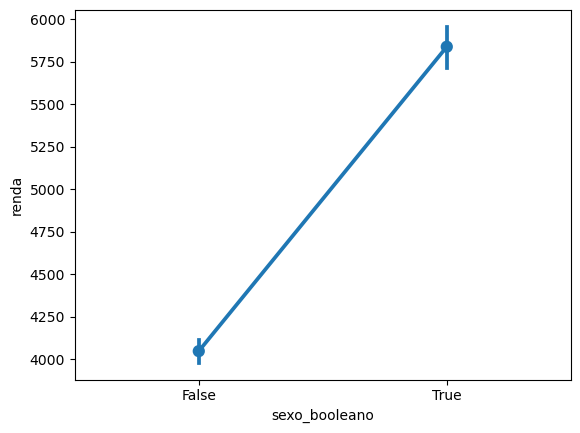

In [21]:
ax = sns.pointplot(x="sexo_booleano", y="renda",
                   data=base2, dodge=True, errorbar=('ci', 90))